In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv('titanic_train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Does being a female increase your chances of survival in the Disaster?

In [5]:
df.shape

(891, 12)

In [6]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S
226,227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5000,NaN,S
553,554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.2250,NaN,C
564,565,0,3,"Meanwell, Miss. (Marion Ogden)",female,NaN,0,0,SOTON/O.Q. 392087,8.0500,NaN,S
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.5000,NaN,Q
836,837,0,3,"Pasic, Mr. Jakob",male,21.0,0,0,315097,8.6625,NaN,S
721,722,0,3,"Jensen, Mr. Svend Lauritz",male,17.0,1,0,350048,7.0542,NaN,S
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
584,585,0,3,"Paulner, Mr. Uscher",male,NaN,0,0,3411,8.7125,NaN,C


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Quality

- Cabin has many missing values
- Embarked has 2 missing values
- Age has many missing values
- Change Ages less than zero to 1
- Age to int
- Survived, Pclass is in integer
- Embarked, Sex is in object
- SibSp and Parch can be merged into Family
- Ticket is inconsistent

In [9]:
df[df['Age']<1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


## Cleaning Data

#### Be sure to make a backup copy of your dataframe

In [10]:
backup=df.copy()

### Issue: Cabin has many missing values
`Solution`: Drop cabin

### Code

In [11]:
df.drop(columns='Cabin',inplace=True)

### Test

In [12]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### Issue: Embarked has 2 missing values
`Solution`: Replace missing values with 'S'

In [13]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Code

In [14]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [15]:
df['Embarked']=df['Embarked'].fillna('S')

### Test

In [16]:
df['Embarked'].isna().sum()

0

### Issue: Age has many missing values
`Solution`: Replace with the means of their designation

In [17]:
def extract_designation(name):
    
    if 'Mr.' in name:
        return 'Mr'
    elif 'Mrs.' in name:
        return 'Mrs'
    elif 'Miss.' in name:
        return 'Miss'
    elif 'Master.' in name:
        return 'Master'
    return 'Mr'

In [18]:
df['Designation']=df['Name'].apply(extract_designation)

In [19]:
age_fill_values=df.groupby('Designation').mean()['Age']

In [20]:
age_fill_values

Designation
Master     4.574167
Miss      21.773973
Mr        32.982311
Mrs       35.898148
Name: Age, dtype: float64

In [21]:
x1=df[df['Designation']=='Mr']
x2=df[df['Designation']=='Mrs']
x3=df[df['Designation']=='Miss']
x4=df[df['Designation']=='Master']

In [22]:
x1.fillna(value={'Age': age_fill_values['Mr']},inplace=True)
x2.fillna(value={'Age': age_fill_values['Mrs']},inplace=True)
x3.fillna(value={'Age': age_fill_values['Miss']},inplace=True)
x4.fillna(value={'Age': age_fill_values['Master']},inplace=True)

C:\Users\The WonderlanD\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [23]:
new_titanic=x1.append([x2,x3,x4],ignore_index=True).sort_values('PassengerId')

### Test

In [24]:
new_titanic['Age'].isna().sum()

0

### Issue: Change Ages less than zero to 1

In [25]:
new_titanic[new_titanic['Age']<1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Designation
857,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S,Master
869,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,Master
777,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,C,Miss
812,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,C,Miss
880,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,S,Master
884,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C,Master
888,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S,Master


### Code

In [26]:
new_titanic['Age']=np.where(new_titanic['Age']<1,1,new_titanic['Age'])

### Test

In [27]:
new_titanic[new_titanic['Age']<1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Designation


### Issue: Age to int

In [28]:
new_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Designation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr
544,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs
669,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss
545,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs
1,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
541,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,Mr
849,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,Miss
850,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.773973,1,2,W./C. 6607,23.4500,S,Miss
542,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,Mr


In [29]:
new_titanic['Age']=new_titanic['Age'].astype(int)

### Issue: Survived, Pclass is in integer

In [30]:
new_titanic['Survived']=new_titanic['Survived'].astype('category')
new_titanic['Pclass']=new_titanic['Pclass'].astype('category')

In [31]:
new_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 543
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
Designation    891 non-null object
dtypes: category(2), float64(1), int32(1), int64(3), object(5)
memory usage: 75.0+ KB


### Issue:Embarked, Sex is in object

In [32]:
new_titanic['Embarked']=new_titanic['Embarked'].astype('category')
new_titanic['Sex']=new_titanic['Sex'].astype('category')

In [33]:
new_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 543
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null category
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null category
Designation    891 non-null object
dtypes: category(4), float64(1), int32(1), int64(3), object(3)
memory usage: 63.0+ KB


### Issue: SibSp and Parch can be merged into Family

In [34]:
new_titanic['Family']=new_titanic['SibSp']+new_titanic['Parch']

In [35]:
new_titanic.drop(columns=['SibSp','Parch'],inplace=True)

In [36]:
new_titanic.drop(columns=['Name'],inplace=True)

In [37]:
new_titanic

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Designation,Family
0,1,0,3,male,22,A/5 21171,7.2500,S,Mr,1
544,2,1,1,female,38,PC 17599,71.2833,C,Mrs,1
669,3,1,3,female,26,STON/O2. 3101282,7.9250,S,Miss,0
545,4,1,1,female,35,113803,53.1000,S,Mrs,1
1,5,0,3,male,35,373450,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...
541,887,0,2,male,27,211536,13.0000,S,Mr,0
849,888,1,1,female,19,112053,30.0000,S,Miss,0
850,889,0,3,female,21,W./C. 6607,23.4500,S,Miss,3
542,890,1,1,male,26,111369,30.0000,C,Mr,0


### Issue : Ticket has not consistency

In [38]:
new_titanic.drop(columns=['Ticket'],inplace=True)

In [39]:
new_titanic

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Designation,Family
0,1,0,3,male,22,7.2500,S,Mr,1
544,2,1,1,female,38,71.2833,C,Mrs,1
669,3,1,3,female,26,7.9250,S,Miss,0
545,4,1,1,female,35,53.1000,S,Mrs,1
1,5,0,3,male,35,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...
541,887,0,2,male,27,13.0000,S,Mr,0
849,888,1,1,female,19,30.0000,S,Miss,0
850,889,0,3,female,21,23.4500,S,Miss,3
542,890,1,1,male,26,30.0000,C,Mr,0


## Cleaned Data


In [40]:
new_titanic

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Designation,Family
0,1,0,3,male,22,7.2500,S,Mr,1
544,2,1,1,female,38,71.2833,C,Mrs,1
669,3,1,3,female,26,7.9250,S,Miss,0
545,4,1,1,female,35,53.1000,S,Mrs,1
1,5,0,3,male,35,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...
541,887,0,2,male,27,13.0000,S,Mr,0
849,888,1,1,female,19,30.0000,S,Miss,0
850,889,0,3,female,21,23.4500,S,Miss,3
542,890,1,1,male,26,30.0000,C,Mr,0


# Exploratory Data Analysis

#### - Out of the 891 people info. that we have, lets see how many of them really survived
#### - survival count based on Gender
#### - survival count of Males and Females and compare it to non-survivors
#### - analysis based on percentage survived?
#### - survival percentage of different Classes of people
#### - survival probability based on Age
#### - survival probability based on Fare
#### - Percentage of Children survived
#### - Probability based on Family size"

### Out of the 891 people info. that we have, lets see how many of them really survived

In [42]:
new_titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Let's see the survival count based on Gender

In [44]:
survived=new_titanic[new_titanic['Survived']==1]

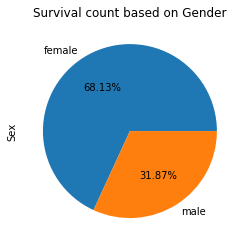

In [50]:
survived['Sex'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Survival count based on Gender')
plt.show()

### Let's see survival count of Males and Females and compare it to non-survivors

In [55]:
male_female=new_titanic.groupby(['Survived','Sex'],as_index=False)['PassengerId'].count()

In [56]:
male_female

,Survived,Sex,PassengerId
0,0,female,81
1,0,male,468
2,1,female,233
3,1,male,109


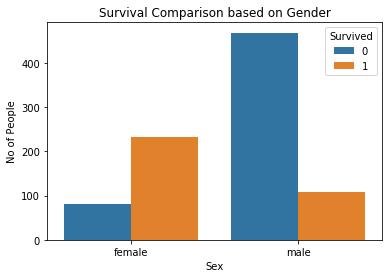

In [59]:
sns.barplot(x='Sex',y='PassengerId',data=male_female,hue='Survived')
plt.title('Survival Comparison based on Gender')
plt.ylabel('No of People')
plt.show()

### But these are hard numbers. What if we could do an analysis based on percentage survived?

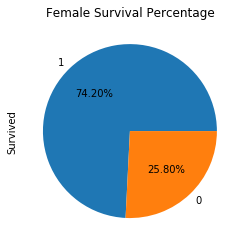

In [64]:
new_titanic[new_titanic['Sex']=='female']['Survived'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Female Survival Percentage')
plt.show()

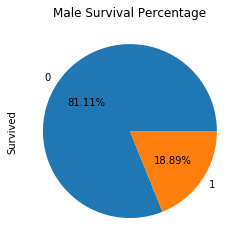

In [65]:
new_titanic[new_titanic['Sex']=='male']['Survived'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Male Survival Percentage')
plt.show()

### Survival comparison of different Classes of people

In [68]:
classes=new_titanic.groupby(['Survived','Pclass'],as_index=False)['PassengerId'].count()

In [69]:
classes

,Survived,Pclass,PassengerId
0,0,1,80
1,0,2,97
2,0,3,372
3,1,1,136
4,1,2,87
5,1,3,119


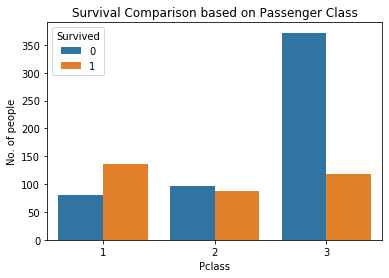

In [71]:
sns.barplot(x='Pclass',y='PassengerId',data=classes,hue='Survived')
plt.title('Survival Comparison based on Passenger Class')
plt.ylabel('No. of people')
plt.show()

### Survival probability based on Age

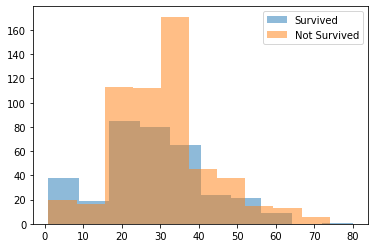

In [75]:
plt.hist(x='Age',data=new_titanic[new_titanic['Survived']==1],alpha=0.5,label='Survived')
plt.hist(x='Age',data=new_titanic[new_titanic['Survived']==0],alpha=0.5,label='Not Survived')
plt.legend()

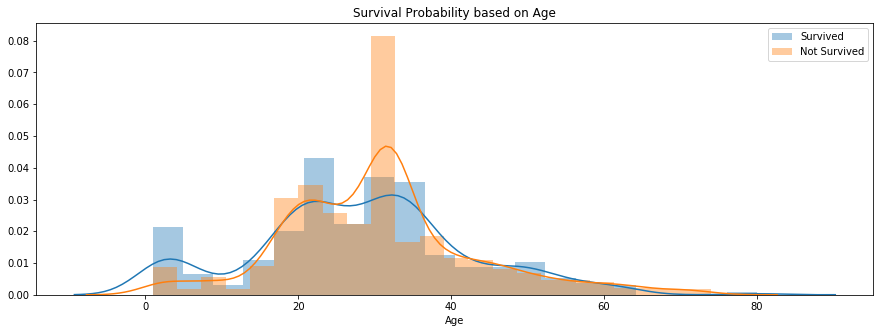

In [77]:
plt.subplots(figsize=(15,5))
sns.distplot(new_titanic[new_titanic['Survived']==1]['Age'],label='Survived')
sns.distplot(new_titanic[new_titanic['Survived']==0]['Age'],label='Not Survived')
plt.legend()
plt.title('Survival Probability based on Age')
plt.show()

### Survival probability based on Fare

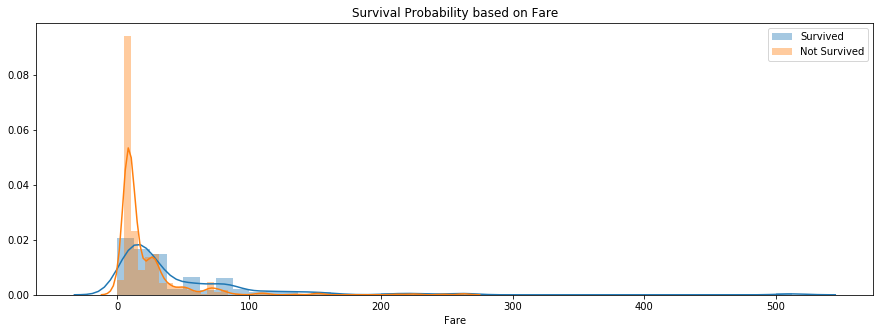

In [78]:
plt.subplots(figsize=(15,5))
sns.distplot(new_titanic[new_titanic['Survived']==1]['Fare'],label='Survived')
sns.distplot(new_titanic[new_titanic['Survived']==0]['Fare'],label='Not Survived')
plt.legend()
plt.title('Survival Probability based on Fare')
plt.show()

### Percentage of Children survived

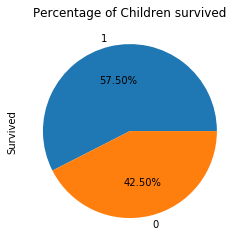

In [84]:
new_titanic[new_titanic['Designation']=='Master']['Survived'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Percentage of Children survived')
plt.show()

### Probability based on Family size

In [87]:
new_titanic['Family'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

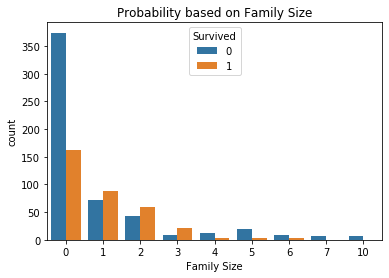

In [89]:
sns.countplot(x='Family',data=new_titanic,hue='Survived')
plt.title('Probability based on Family Size')
plt.xlabel('Family Size')
plt.show()

## Conclusion

#### - Women and Children were given utmost importance
#### - Almost 70% of the survivors were females
#### - Out of all females only 74 % survived and out of all males only 19% survived.
#### - Passengers from Class 1 and who paid high fairs were given the utmost priority
#### - Out of all children only  57% survived.
#### - Passengers with family members 1 to 3 had more chances of survival

# Yes! Being a female increases your chances of survival.